In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Setting to make numbers easier to read on display 
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option("display.max_columns",999)

In [2]:
df = pd.read_excel("D:/VS/api/ML_Models/online_retail_II.xlsx", sheet_name=0)
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [4]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [5]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [6]:
df[df["Customer ID"].isna()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom


In [7]:
df[df['Quantity'] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [8]:
df['Invoice'] = df["Invoice"].astype(str)
df[df['Invoice'].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [9]:
df['Invoice'].str.replace('[0-9]', '', regex=True)

0          
1          
2          
3          
4          
         ..
525456     
525457     
525458     
525459     
525460     
Name: Invoice, Length: 525461, dtype: object

In [10]:
df[df['Invoice'].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [11]:
df['StockCode'] = df['StockCode'].astype(str)
df[(df['StockCode'].str.match("^\\d{5}$") == False) & (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [12]:
df[df['StockCode'].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [13]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [14]:
cleaned_df = df.copy()

In [15]:
cleaned_df['Invoice'] = cleaned_df['Invoice'].astype('str')

mask = (
    cleaned_df['Invoice'].str.match('^\\d{6}$') == True
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [16]:
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype('str')
mask = (
    (cleaned_df['StockCode'].str.match("^\\d{5}$") == True)
    | (cleaned_df['StockCode'].str.match("^\\d{5}&[a-zA-Z]+$") == True)
    | (cleaned_df['StockCode'].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


In [17]:
cleaned_df.dropna(subset=['Customer ID'] , inplace=True)

C:\Users\Pc\AppData\Local\Temp\ipykernel_13904\2867173388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=['Customer ID'] , inplace=True)


In [18]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,350943.00,350943,350943.00,350943.00
mean,13.70,2010-07-05 17:09:34.748549120,2.98,15360.24
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-31 17:29:00,1.25,13985.00
50%,5.00,2010-07-18 13:42:00,1.95,15311.00
75%,12.00,2010-10-17 14:26:00,3.75,16797.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,100.07,NaN,4.42,1678.20


In [19]:
len(cleaned_df[cleaned_df["Price"] == 0])

27

In [20]:
cleaned_df = cleaned_df[cleaned_df['Price'] > 0]

In [21]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,350916.00,350916,350916.00,350916.00
mean,13.70,2010-07-05 17:14:15.798311168,2.98,15360.35
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-31 17:29:00,1.25,13985.00
50%,5.00,2010-07-18 13:42:00,1.95,15311.00
75%,12.00,2010-10-17 14:26:00,3.75,16797.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,100.08,NaN,4.42,1678.16


In [22]:
cleaned_df['Price'].min()

0.001

In [23]:
len(cleaned_df)/len(df)

0.667825014606222

In [24]:
#Droped 34% of the data

### Feature Engineering

In [25]:
cleaned_df['SalesLineTotal'] = cleaned_df['Quantity']*cleaned_df['Price']
cleaned_df.head(10)

C:\Users\Pc\AppData\Local\Temp\ipykernel_13904\3876565569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['SalesLineTotal'] = cleaned_df['Quantity']*cleaned_df['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom,39.60
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom,59.50
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom,30.60
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom,45.00
10,489435,22195,HEART MEASURING SPOONS LARGE,24,2009-12-01 07:46:00,1.65,13085.00,United Kingdom,39.60
11,489435,22353,LUNCHBOX WITH CUTLERY FAIRY CAKES,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom,30.60


In [26]:
cleaned_df['Customer ID'].nunique()

4248

In [27]:
aggregated_df = cleaned_df.groupby(by='Customer ID', as_index=False) \
    .agg(
        MonetaryValue=("SalesLineTotal", "sum"),
        Frequency=("Invoice", "nunique"),
        LastInvoiceDate=("InvoiceDate", "max")
    )
    
aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,144.02,2,2010-06-28 13:53:00
1,12347.00,966.87,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,1946.64,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [28]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

In [29]:
max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [30]:
aggregated_df['Recency'] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

In [31]:
aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,144.02,2,2010-06-28 13:53:00,164
1,12347.00,966.87,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,1946.64,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


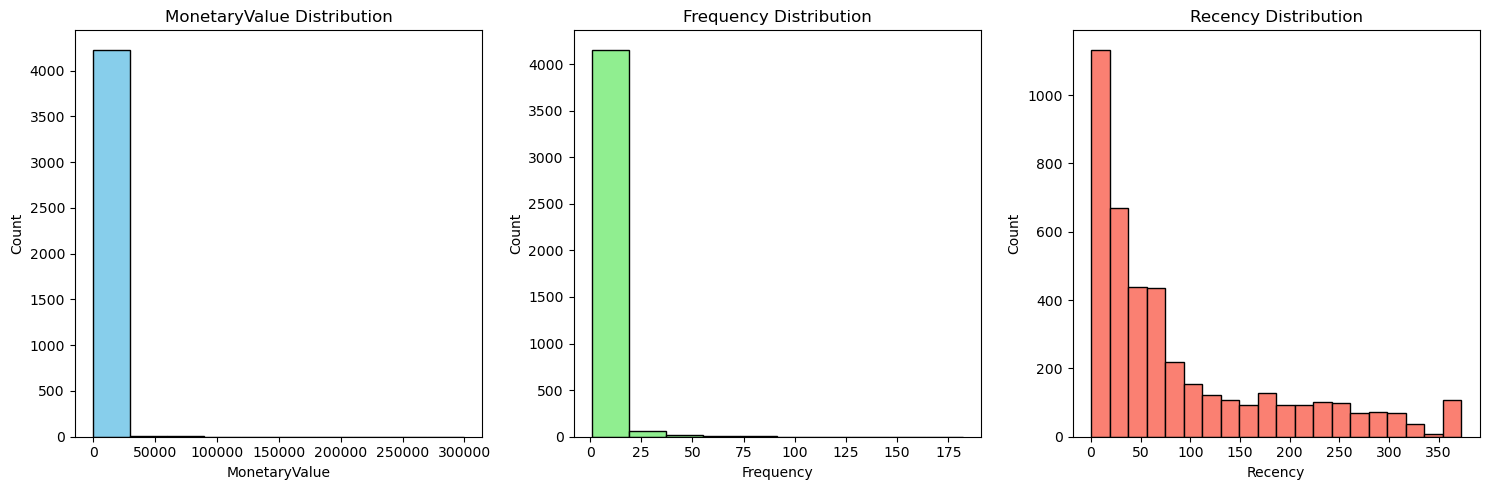

In [32]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df["MonetaryValue"], bins=10, color='skyblue', edgecolor='black')
plt.title("MonetaryValue Distribution")
plt.xlabel("MonetaryValue")
plt.ylabel("Count")

plt.subplot(1,3,2)
plt.hist(aggregated_df["Frequency"], bins=10, color='lightgreen', edgecolor='black')
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title("Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

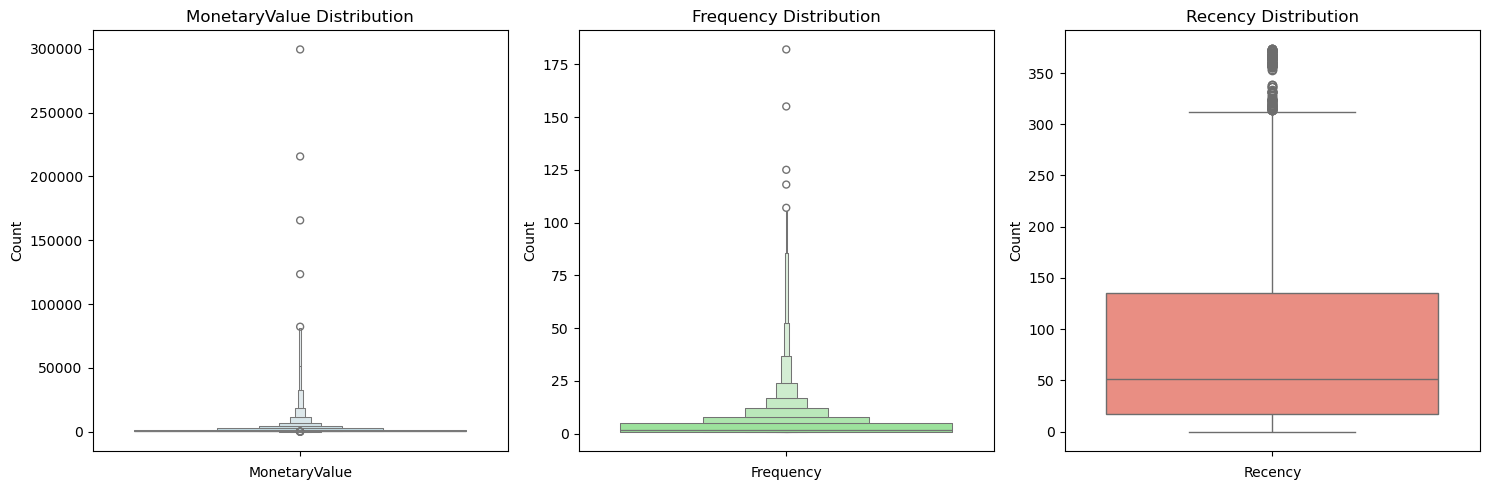

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxenplot(data=aggregated_df['MonetaryValue'], color='lightblue')
plt.title("MonetaryValue Distribution")
plt.xlabel("MonetaryValue")
plt.ylabel("Count")

plt.subplot(1,3,2)
sns.boxenplot(data=aggregated_df['Frequency'], color='lightgreen')
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("Count")

plt.subplot(1,3,3)
sns.boxplot(data=aggregated_df['Recency'], color='salmon')
plt.title("Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [34]:
M_Q1 = aggregated_df['MonetaryValue'].quantile(0.25)
M_Q3 = aggregated_df['MonetaryValue'].quantile(0.75)

M_IQR = M_Q3 - M_Q1
M_IQR

1214.4850000000001

In [35]:
Monetary_outliers = aggregated_df[(aggregated_df['MonetaryValue'] > M_Q3 + 1.5*M_IQR) | (aggregated_df['MonetaryValue'] < M_Q1 - 1.5*M_IQR)].copy()
Monetary_outliers.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,412.00,412.00,412.00,412,412.00
mean,15083.30,10433.19,17.03,2010-11-10 21:01:28.106796032,28.67
min,12357.00,3308.90,1.00,2009-12-10 18:03:00,0.00
25%,13561.75,3957.30,8.00,2010-11-08 13:45:45,3.00
50%,14956.50,5389.85,12.00,2010-11-26 15:03:30,13.00
75%,16653.00,8847.18,18.00,2010-12-06 12:47:30,31.00
max,18260.00,299485.80,182.00,2010-12-09 19:32:00,364.00
std,1733.82,22291.55,19.38,NaN,49.15


In [36]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

Frequency_outliers = aggregated_df[(aggregated_df['Frequency'] > F_Q3 + 1.5*F_IQR) | (aggregated_df['Frequency'] < F_Q1 - 1.5*F_IQR)].copy()
Frequency_outliers.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,269.00,269.00,269.00,269,269.00
mean,15392.80,12298.98,23.70,2010-11-23 16:23:39.033456896,15.87
min,12437.00,898.14,12.00,2010-05-12 16:51:00,0.00
25%,13831.00,3638.01,13.00,2010-11-21 10:38:00,2.00
50%,15527.00,5572.67,17.00,2010-12-02 12:09:00,7.00
75%,16883.00,10269.46,24.00,2010-12-07 12:43:00,18.00
max,18260.00,299485.80,182.00,2010-12-09 19:32:00,211.00
std,1748.38,27198.75,21.58,NaN,26.79


In [37]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(Monetary_outliers.index)) & (~aggregated_df.index.isin(Frequency_outliers.index))]
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3785.00,3785.00,3785.00,3785,3785.00
mean,15372.18,773.15,2.86,2010-09-03 14:28:03.788639232,96.95
min,12346.00,2.95,1.00,2009-12-01 12:55:00,0.00
25%,13909.00,236.40,1.00,2010-07-08 16:56:00,22.00
50%,15379.00,508.57,2.00,2010-10-12 17:17:00,58.00
75%,16847.00,1115.97,4.00,2010-11-17 13:42:00,154.00
max,18287.00,3298.60,11.00,2010-12-09 20:01:00,373.00
std,1691.82,714.34,2.23,NaN,98.12


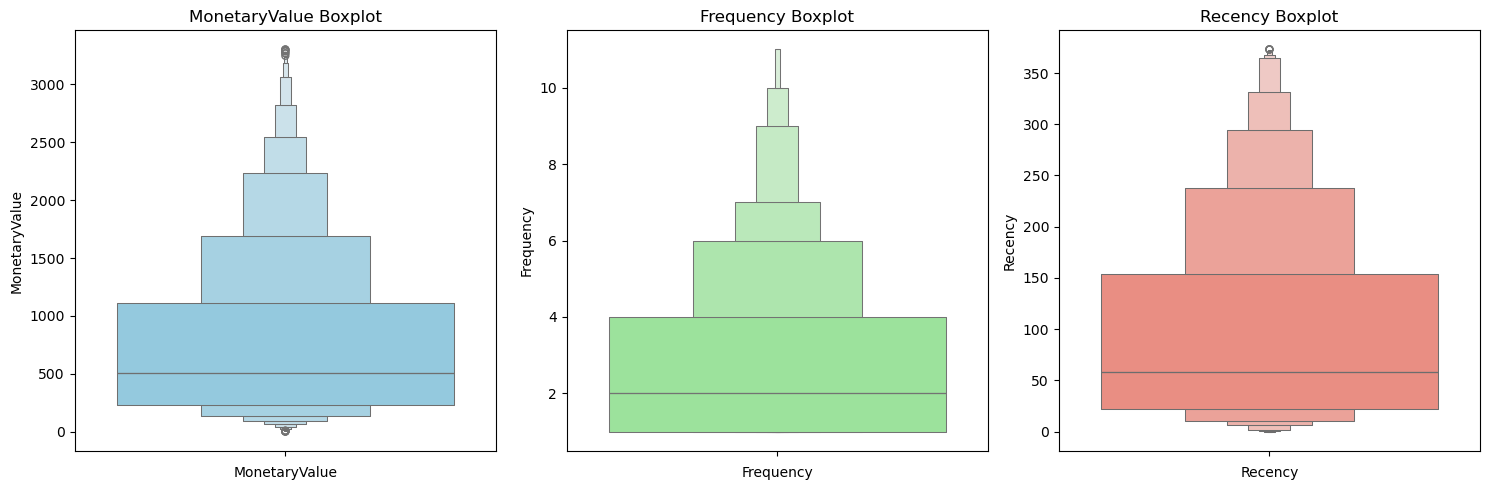

In [38]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxenplot(data=non_outliers_df["MonetaryValue"], color='skyblue')
plt.title("MonetaryValue Boxplot")
plt.xlabel("MonetaryValue")

plt.subplot(1,3,2)
sns.boxenplot(data=non_outliers_df["Frequency"], color='lightgreen')
plt.title("Frequency Boxplot")
plt.xlabel("Frequency")

plt.subplot(1,3,3)
sns.boxenplot(data=non_outliers_df["Recency"], color='salmon')
plt.title("Recency Boxplot")
plt.xlabel("Recency")

plt.tight_layout()
plt.show()

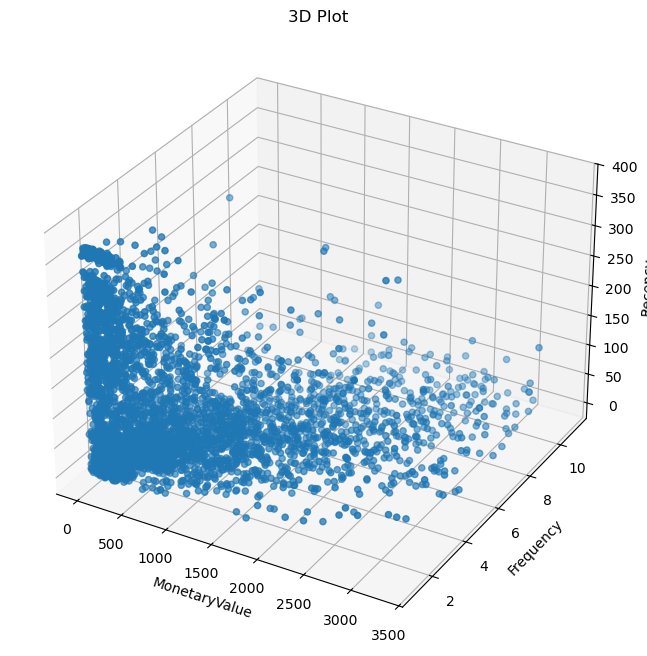

In [39]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel("MonetaryValue")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Plot")

plt.show()

Standard Scaling tranforms the features of your data to have a mean of 0 and a standard deviation of 1, ensuring that each features contirbutes equally to the analysis.

X_scaled = (X - μ) / σ

X_scaled - Standardized value
X - original value
μ - mean of the feature
σ - standard deviation of the feature

In [40]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[['MonetaryValue', 'Frequency', 'Recency']])

scaled_data

array([[-0.88083728, -0.3837042 ,  0.68341659],
       [ 0.27122348, -0.3837042 , -0.96777989],
       [-0.77283465, -0.83167471, -0.24410736],
       ...,
       [-0.57690661, -0.83167471,  2.01864337],
       [ 0.24522388, -0.3837042 ,  0.14321033],
       [ 1.07896109,  0.51223682, -0.81489133]])

In [41]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=['MonetaryValue', 'Frequency', 'Recency'])
scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.27,-0.38,-0.97
2,-0.77,-0.83,-0.24
3,1.64,-0.38,-0.56
4,-0.66,-0.83,-0.89
...,...,...,...
4243,-0.29,1.41,-0.81
4244,-0.53,-0.83,-0.32
4245,-0.58,-0.83,2.02
4246,0.25,-0.38,0.14


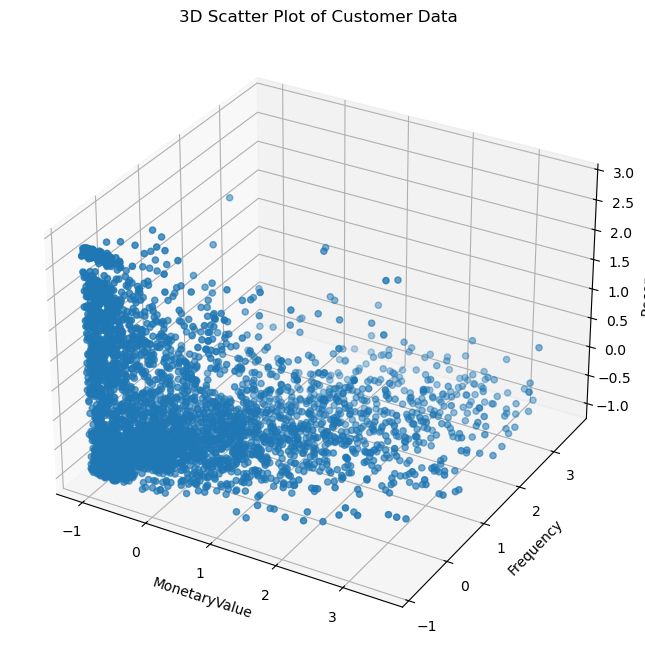

In [42]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(scaled_data_df['MonetaryValue'], scaled_data_df['Frequency'], scaled_data_df['Recency'])

ax.set_xlabel("MonetaryValue")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot of Customer Data")

plt.show()

### KMean Cluster

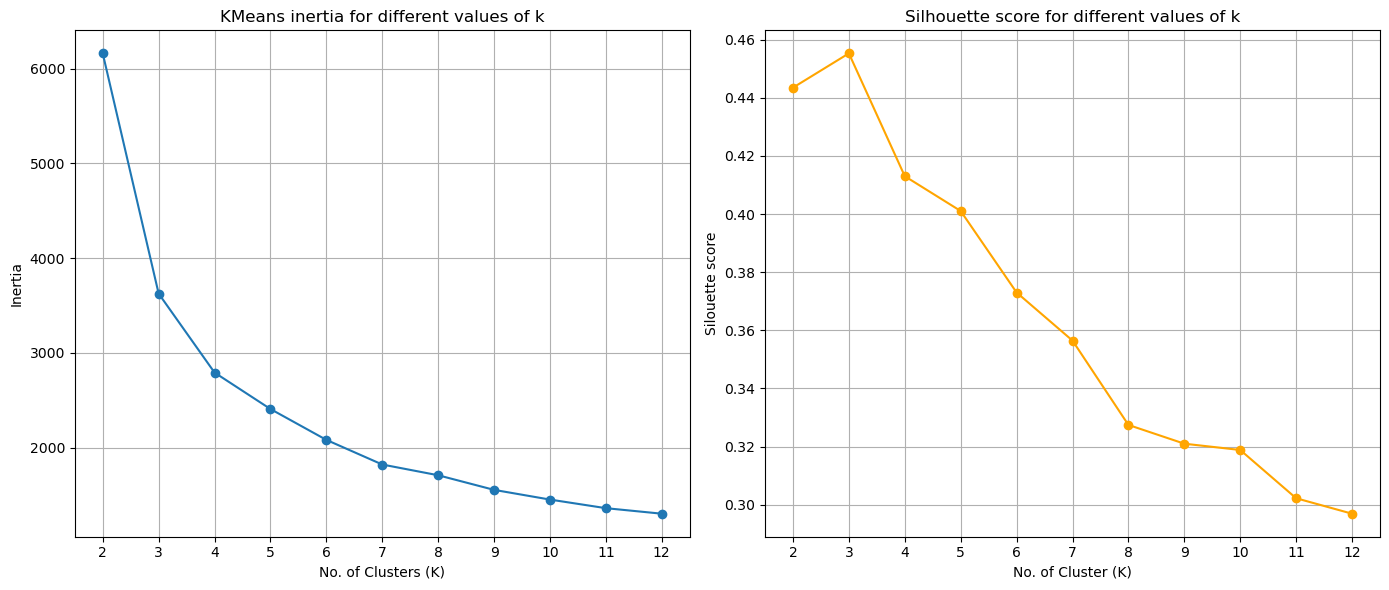

In [43]:
max_k = 12

inertia = []

silhouette_scores = []

k_values = range(2, max_k + 1)

for k in k_values:
    
    kmean = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    
    cluster_label = kmean.fit_predict(scaled_data_df)
    
    sil_score = silhouette_score(scaled_data_df, cluster_label)
    
    silhouette_scores.append(sil_score)
        
    inertia.append(kmean.inertia_)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(k_values, inertia ,marker='o')
plt.title("KMeans inertia for different values of k")
plt.xlabel("No. of Clusters (K)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette score for different values of k')
plt.xlabel("No. of Cluster (K)")
plt.ylabel("Silouette score")
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()
    

### Silhouette Score

The silhouette score tells you how well each data point fits into its assigned cluster compared to other clusters.

s(i) = b(i) − a(i) / max(a(i),b(i))
​
a(i) - The avg distance from point i to all other points in the same clusters

b(i) - The lowest avg distance from point i to all points in the nearest different cluster 

s(i) - Silhouette score for that point(range(-1,1))


In [44]:
kmean = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_label = kmean.fit_predict(scaled_data_df)
cluster_label

array([0, 2, 2, ..., 0, 2, 1])

In [45]:
non_outliers_df['Cluster'] = cluster_label
non_outliers_df

C:\Users\Pc\AppData\Local\Temp\ipykernel_13904\2838725790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Cluster'] = cluster_label


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,144.02,2,2010-06-28 13:53:00,164,0
1,12347.00,966.87,2,2010-12-07 14:57:00,2,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,1946.64,2,2010-10-28 08:23:00,42,1
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4243,18283.00,563.19,6,2010-11-22 15:30:00,17,1
4244,18284.00,391.28,1,2010-10-04 11:33:00,66,2
4245,18285.00,361.10,1,2010-02-17 10:24:00,295,0
4246,18286.00,948.30,2,2010-08-20 11:57:00,111,2


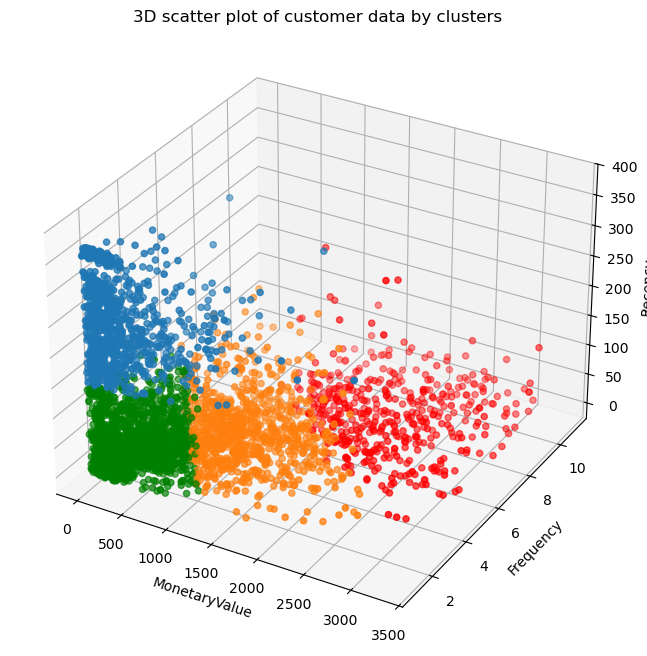

In [46]:
cluster_color = {
                0 : '#1f77b4',
                1 : '#ff7f0e',
                2 : '#008000',
                3 : '#ff0000'
                }

colors = non_outliers_df['Cluster'].map(cluster_color)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(
                    non_outliers_df['MonetaryValue'],
                    non_outliers_df['Frequency'],
                    non_outliers_df['Recency'],
                    c = colors,
                    marker='o'
)

ax.set_xlabel("MonetaryValue")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D scatter plot of customer data by clusters")

plt.show()

In [47]:
non_outliers_df['Cluster'].unique()

array([0, 2, 1, 3])

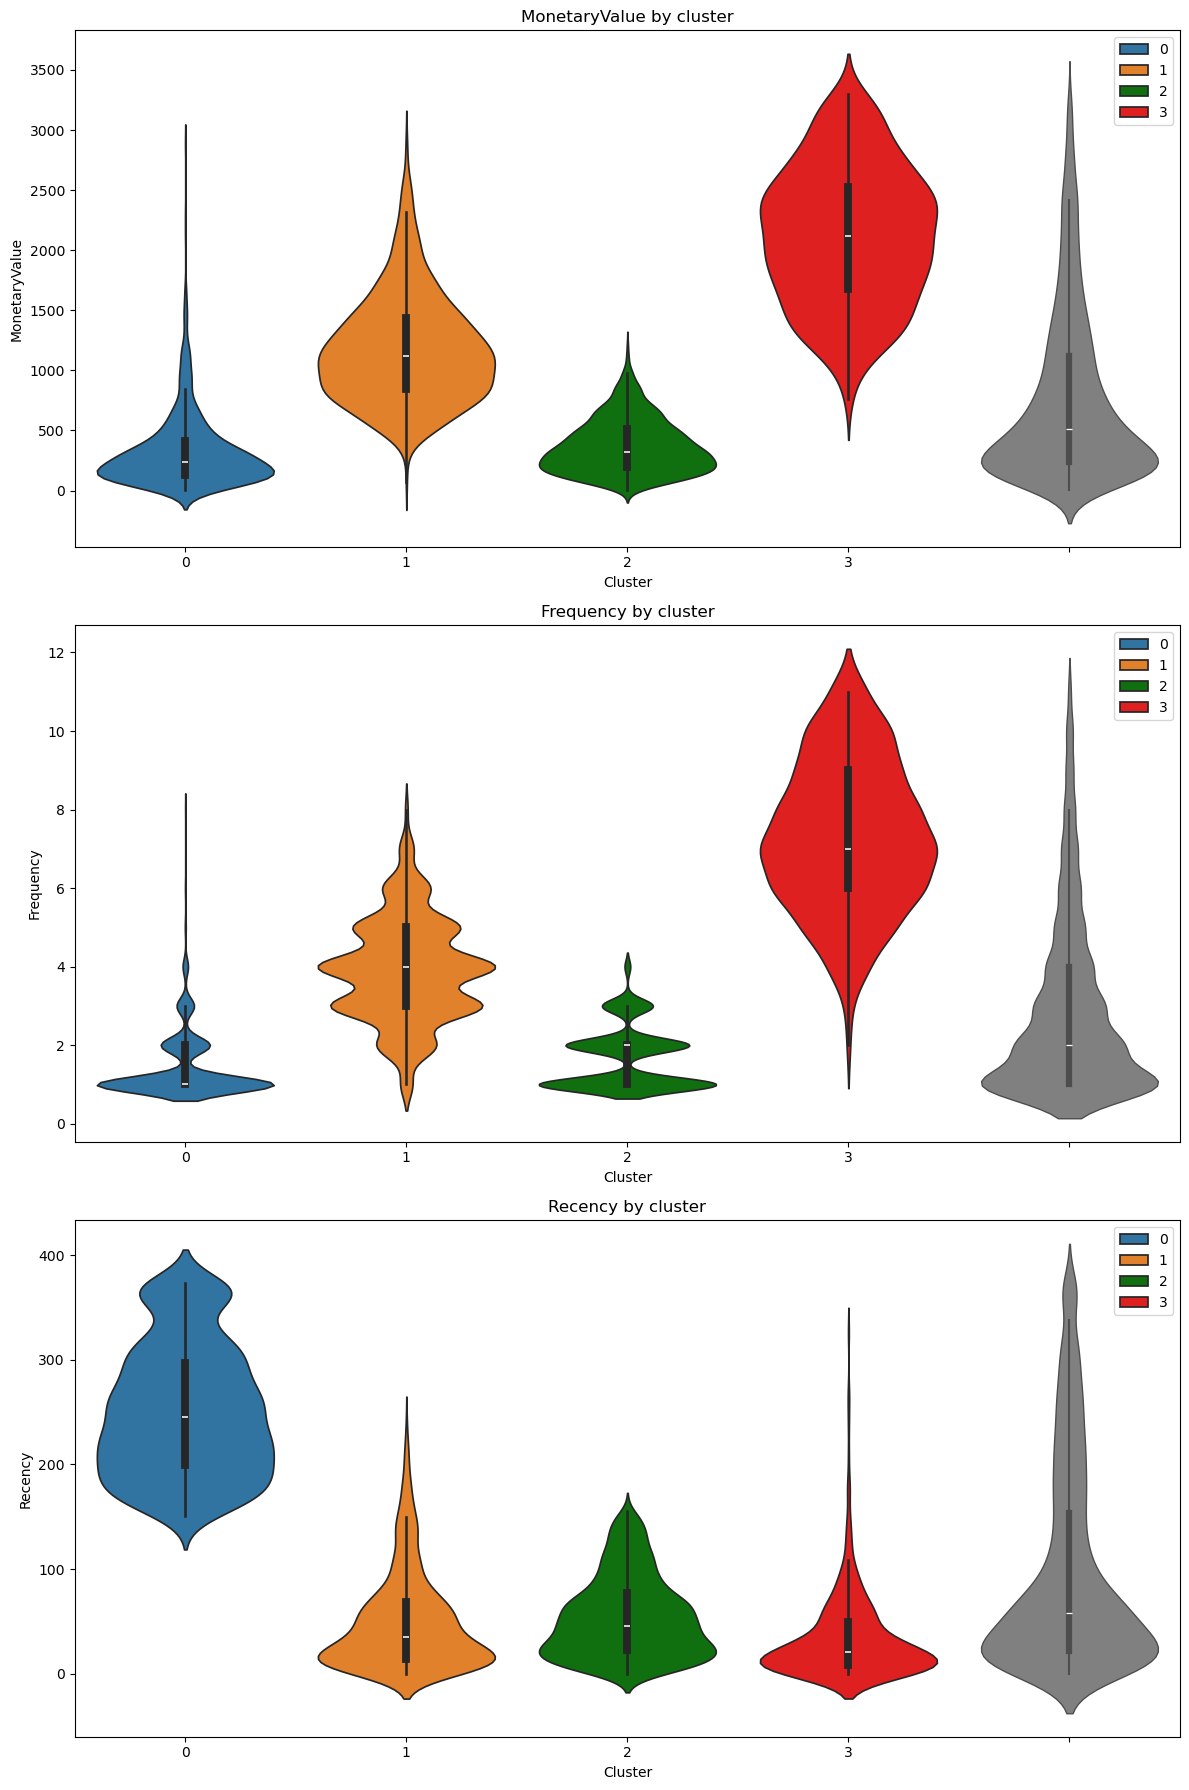

In [48]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x = non_outliers_df['Cluster'], y = non_outliers_df['MonetaryValue'], palette=cluster_color, hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='grey', linewidth=1.0)
plt.title("MonetaryValue by cluster")
plt.ylabel("MonetaryValue")

plt.subplot(3,1,2)
sns.violinplot(x = non_outliers_df['Cluster'], y = non_outliers_df['Frequency'], palette=cluster_color, hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Frequency'], color='grey', linewidth=1.0)
plt.title("Frequency by cluster")
plt.ylabel("Frequency")

plt.subplot(3,1,3)
sns.violinplot(x = non_outliers_df['Cluster'], y = non_outliers_df['Recency'], palette=cluster_color, hue=non_outliers_df['Cluster'])
sns.violinplot(y = non_outliers_df['Recency'], color='grey', linewidth=1.0)
plt.title("Recency by cluster")
plt.ylabel("Recency")

plt.tight_layout()
plt.show()

##### 🔵 Cluster 0 (Blue):
* Rationale: These are the customers who have purchased recently. We need to ensure they continue purchasing and that their spending and frequency increase.
* Action: Attract them with special offers and keep them updated about new stock arrivals.

##### 🟠 Cluster 1 (Orange):
* Rationale: These are customers who used to purchase more frequently, but their recency has dropped.
* Action: Use targeted marketing campaigns, attract them with loyalty benefits and exclusive offers designed for frequent buyers.

##### 🟢 Cluster 2 (Green):
* Rationale: These customers do not purchase often, and we want to encourage them to buy more.
* Action: Focus on building relationship, provide better customers services and attract them with sales and special discount offers.

##### 🔴 Cluster 3 (Red):
* Rationale: These are customers who purchase frequently, and we want them to continue buying more.
* Action: Provide loyalty benefits and exclusive offers tailored for frequent buyers.

##### Summery of Clusters:
* Cluster 0 (Blue) : Re-engage
* Cluster 1 (Orange) : Retain
* Cluster 2 (Green) : Nurture
* Cluster 3 (Red) : Reward 

In [49]:
overlap_indices = Monetary_outliers.index.intersection(Frequency_outliers.index)

Monetary_only_outliers = Monetary_outliers.drop(overlap_indices)
Frequency_only_outliers = Frequency_outliers.drop(overlap_indices)
Monetary_and_Frequency_outliers = Monetary_outliers.loc[overlap_indices]

Monetary_only_outliers['Cluster'] = -1
Frequency_only_outliers['Cluster'] = -2
Monetary_and_Frequency_outliers['Cluster'] = -3

outliers_df = pd.concat([Monetary_only_outliers,Frequency_only_outliers,Monetary_and_Frequency_outliers])
outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,10468.27,1,2010-11-16 10:05:00,23,-1
25,12380.00,4131.84,4,2010-08-31 14:54:00,100,-1
41,12409.00,11171.42,4,2010-10-15 10:24:00,55,-1
47,12415.00,17985.44,4,2010-11-29 15:07:00,10,-1
59,12429.00,3515.55,5,2010-12-09 12:05:00,0,-1
...,...,...,...,...,...,...
4199,18223.00,6633.17,12,2010-11-17 12:20:00,22,-3
4200,18225.00,5937.33,15,2010-12-09 15:46:00,0,-3
4201,18226.00,4776.81,15,2010-11-26 15:51:00,13,-3
4205,18231.00,4266.26,23,2010-10-29 14:17:00,41,-3


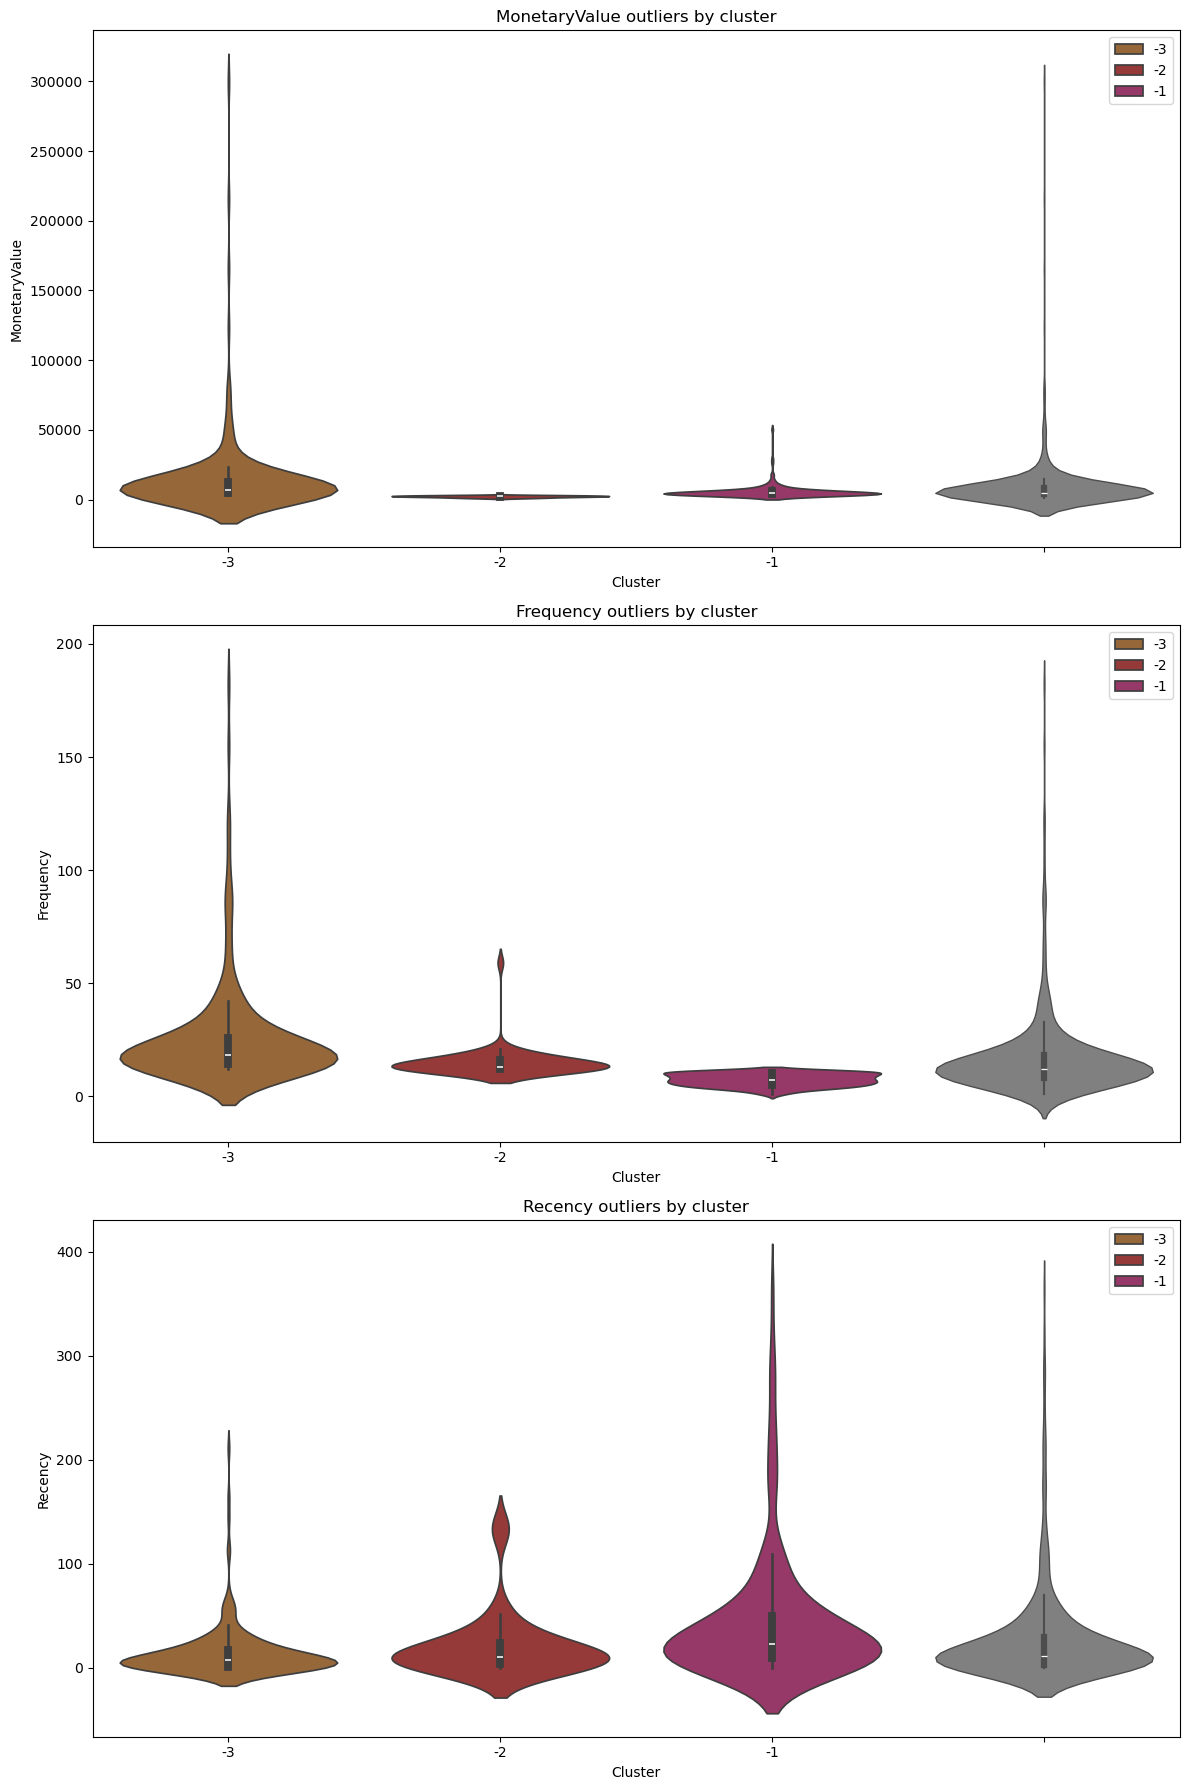

In [50]:
color_clusters = {
    -1 : "#a52a68",
    -2 : "#a52a2a",
    -3 : "#a5682a"
}

plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=outliers_df['Cluster'], y=outliers_df['MonetaryValue'], palette=color_clusters, hue=outliers_df['Cluster'])
sns.violinplot(y=outliers_df['MonetaryValue'], color='grey', linewidth=1.0)
plt.title('MonetaryValue outliers by cluster')
plt.ylabel("MonetaryValue")

plt.subplot(3,1,2)
sns.violinplot(x=outliers_df['Cluster'], y=outliers_df['Frequency'], palette=color_clusters, hue=outliers_df['Cluster'])
sns.violinplot(y=outliers_df['Frequency'], color='grey', linewidth=1.0)
plt.title('Frequency outliers by cluster')
plt.ylabel("Frequency")

plt.subplot(3,1,3)
sns.violinplot(x=outliers_df['Cluster'], y=outliers_df['Recency'], palette=color_clusters, hue=outliers_df['Cluster'])
sns.violinplot(y=outliers_df['Recency'], color='grey', linewidth=1.0)
plt.title('Recency outliers by cluster')
plt.ylabel("Recency")

plt.tight_layout()
plt.show()

* CLUSTER -1 (Monetary Outliers): "PAMPER"
* CLUSTER -2 (Frequency Outliers): "UPSELL"
* CLUSTER -3 (Monetary and Frequency Outliers): "DELIGHT" 

In [51]:
cluster_labels = {
    0: 'Re-engage',
    1: 'Retain',
    2: 'Nurture',
    3: 'Reward',
    -1: 'Pamper',
    -2: 'Upsell',
    -3: 'Delight'
}

In [52]:
full_cluster_df = pd.concat([non_outliers_df, outliers_df])
full_cluster_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,144.02,2,2010-06-28 13:53:00,164,0
1,12347.00,966.87,2,2010-12-07 14:57:00,2,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,1946.64,2,2010-10-28 08:23:00,42,1
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4199,18223.00,6633.17,12,2010-11-17 12:20:00,22,-3
4200,18225.00,5937.33,15,2010-12-09 15:46:00,0,-3
4201,18226.00,4776.81,15,2010-11-26 15:51:00,13,-3
4205,18231.00,4266.26,23,2010-10-29 14:17:00,41,-3


In [53]:
full_cluster_df['Cluster Label'] = full_cluster_df['Cluster'].map(cluster_labels)
full_cluster_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,Cluster Label
0,12346.00,144.02,2,2010-06-28 13:53:00,164,0,Re-engage
1,12347.00,966.87,2,2010-12-07 14:57:00,2,2,Nurture
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2,Nurture
3,12349.00,1946.64,2,2010-10-28 08:23:00,42,1,Retain
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2,Nurture
...,...,...,...,...,...,...,...
4199,18223.00,6633.17,12,2010-11-17 12:20:00,22,-3,Delight
4200,18225.00,5937.33,15,2010-12-09 15:46:00,0,-3,Delight
4201,18226.00,4776.81,15,2010-11-26 15:51:00,13,-3,Delight
4205,18231.00,4266.26,23,2010-10-29 14:17:00,41,-3,Delight


C:\Users\Pc\AppData\Local\Temp\ipykernel_13904\1807871411.py:12: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=feature_means, ax=ax2, palette='Set2', markers='o')


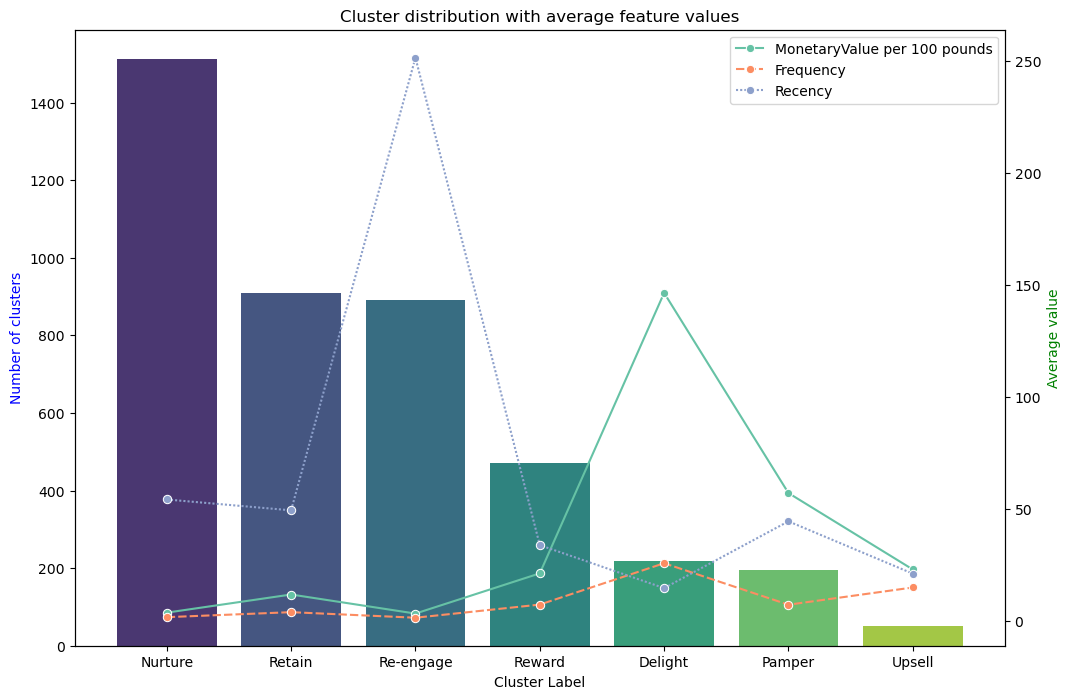

In [81]:
cluster_count = full_cluster_df['Cluster Label'].value_counts()
full_cluster_df['MonetaryValue per 100 pounds'] = full_cluster_df['MonetaryValue'] / 100.00
feature_means = full_cluster_df.groupby('Cluster Label')[['MonetaryValue per 100 pounds', 'Frequency', 'Recency']].mean()

fig, ax1 = plt.subplots(figsize=(12,8))

sns.barplot(x=cluster_count.index, y=cluster_count.values, ax=ax1, palette='viridis', hue=cluster_count.index)
ax1.set_ylabel('Number of clusters', color='b')
ax1.set_title('Cluster distribution with average feature values')

ax2 = ax1.twinx()
sns.lineplot(data=feature_means, ax=ax2, palette='Set2', markers='o')
ax2.set_ylabel('Average value', color='g')

plt.show()

In [4]:
from datetime import date
date = date(2005,2,13).isoformat()
date

'2005-02-13'